In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum06"

In [9]:
df = pd.read_csv(path + '/data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [12]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
df["Sleep Disorder"].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [14]:
# mapping label -> kode untuk target
Sleep_Disorder_cat = df['Sleep Disorder'].astype('category')
Sleep_Disorder_classes = list(Sleep_Disorder_cat.cat.categories)  # urutan kelas
df['Sleep Disorder'] = Sleep_Disorder_cat.cat.codes               # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['Gender','Occupation', 'BMI Category', 'Blood Pressure']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,-1
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,-1
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,-1
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,1


In [15]:
X = df[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
        'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']]

#Kolom Target (label)
y= df['Sleep Disorder']

In [16]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,2,22,85,3000
4,1,28,6,5.9,4,30,8,2,22,85,3000


In [17]:
y.head()

,Sleep Disorder
0,-1
1,-1
2,-1
3,1
4,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Membua model SVM dengan kernel Linear
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#Laporan klasifikasi
print("\nLaporan Klasifikasi:n/", classification_report(y_test, y_pred))

Akurasi: 86.67%

Laporan Klasifikasi:n/               precision    recall  f1-score   support

          -1       0.95      0.93      0.94        43
           0       0.67      0.88      0.76        16
           1       0.92      0.69      0.79        16

    accuracy                           0.87        75
   macro avg       0.85      0.83      0.83        75
weighted avg       0.88      0.87      0.87        75




Confusion Matrix : 
 [[40  3  0]
 [ 1 14  1]
 [ 1  4 11]]


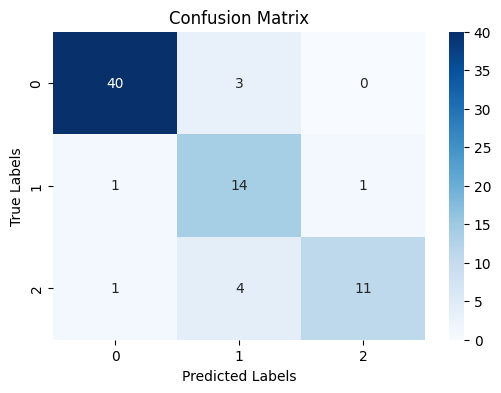

In [20]:
print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

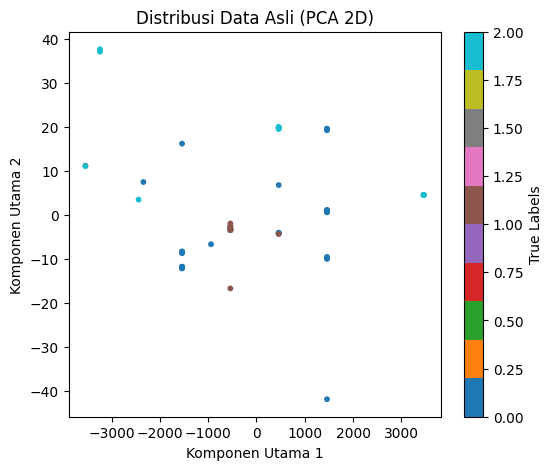

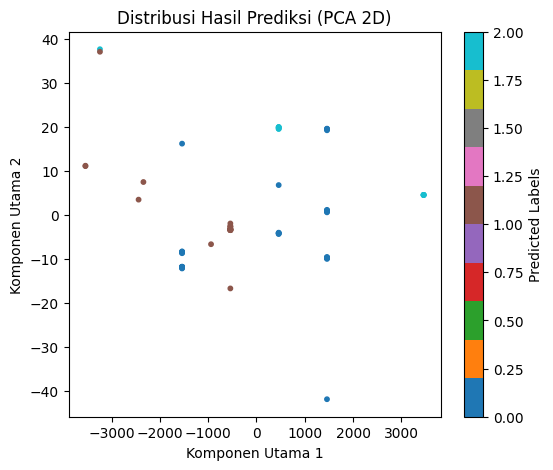

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# --- 1. Reduci dimensi jadi 2D untuk visualisasi ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# --- Encode labels ---
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# --- 2. Plot berdasarkan label asli ---
plt.figure(figsize=(6,5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test_encoded, cmap='tab10', s=10)
plt.title('Distribusi Data Asli (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='True Labels')
plt.show()

# --- 3. Plot berdasarkan label prediksi ---
plt.figure(figsize=(6,5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_pred_encoded, cmap='tab10', s=10)
plt.title('Distribusi Hasil Prediksi (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Predicted Labels')
plt.show()

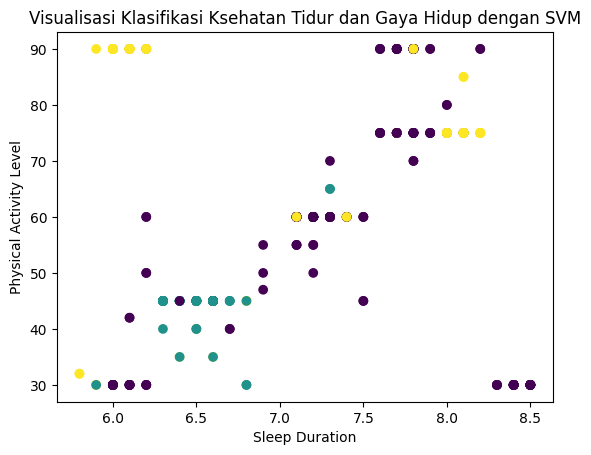

In [22]:
plt.scatter(df['Sleep Duration'], df['Physical Activity Level'], c=df['Sleep Disorder'].astype('category').cat.codes)
plt.xlabel('Sleep Duration')
plt.ylabel('Physical Activity Level')
plt.title('Visualisasi Klasifikasi Ksehatan Tidur dan Gaya Hidup dengan SVM')
plt.show()

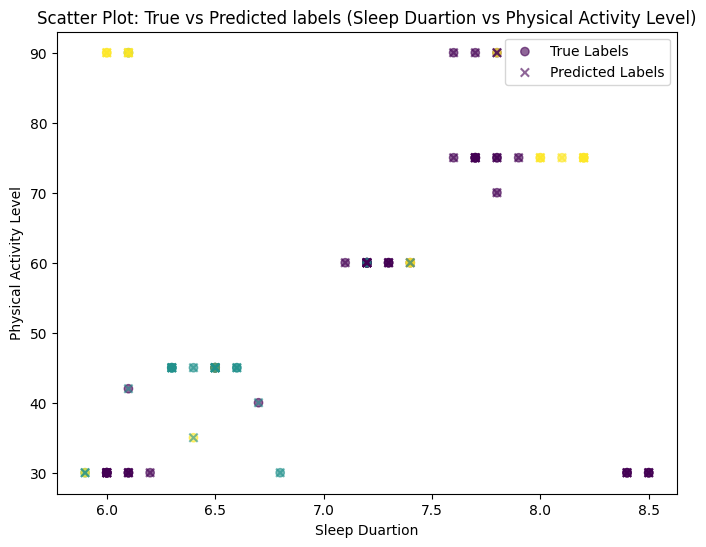

In [23]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6))

# plot titik berdasarkan label asli
plt.scatter(
    X_test['Sleep Duration'],
    X_test['Physical Activity Level'],
    c=y_test_encoded,
    cmap='viridis',
    marker='o',
    label='True Labels',
    alpha=0.6
)

# plot titik berdasarkan label hasil prediksi
plt.scatter(
    X_test['Sleep Duration'],
    X_test['Physical Activity Level'],
    c=y_pred_encoded,
    cmap='viridis',
    marker='x',
    label='Predicted Labels',
    alpha=0.6
)

plt.title("Scatter Plot: True vs Predicted labels (Sleep Duartion vs Physical Activity Level)")
plt.xlabel("Sleep Duartion")
plt.ylabel("Physical Activity Level")
plt.legend()
plt.show()

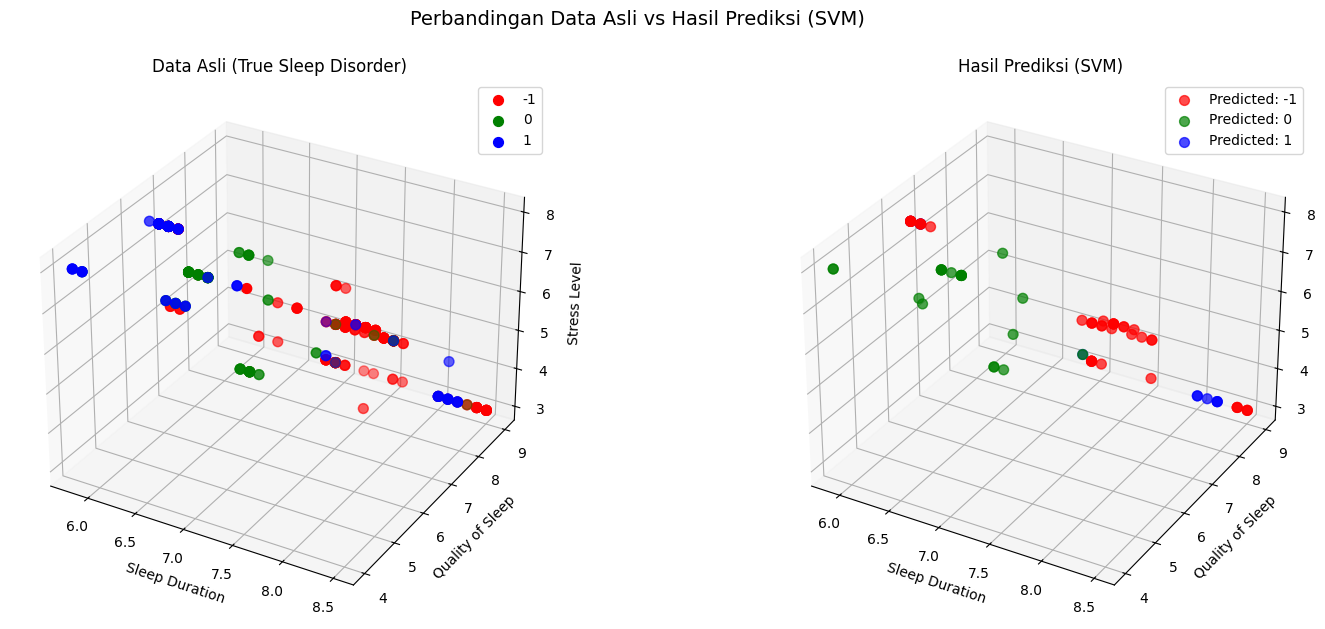

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SleepDisorderEncoded'] = le.fit_transform(df['Sleep Disorder'])

# 8. Plot 3D hasil klasifikasi (asli vs prediksi)
fig = plt.figure(figsize=(18, 7))

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# ========== Plot Data Asli ==========
ax1 = fig.add_subplot(121, projection='3d')
for i, sleep_disorder in enumerate(labels):
    subset = df[df['SleepDisorderEncoded'] == i]
    ax1.scatter(
        subset['Sleep Duration'],
        subset['Quality of Sleep'],
        subset['Stress Level'],
        color=colors[i],
        label=sleep_disorder,
        s=50
    )

ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Quality of Sleep')
ax1.set_zlabel('Stress Level')
ax1.set_title('Data Asli (True Sleep Disorder)')
ax1.legend()

# ========== Plot Data Prediksi ==========
# Simpan hasil prediksi ke dataframe
df['Predicted'] = None
df.loc[X_test.index, 'Predicted'] = y_pred

# Encode hasil prediksi (jika masih teks)
if df['Predicted'].dtype == 'object':
    df.loc[X_test.index, 'PredictedEncoded'] = le.transform(df.loc[X_test.index, 'Predicted'])
else:
    df['PredictedEncoded'] = df['Predicted']

ax2 = fig.add_subplot(122, projection='3d')
for i, sleep_disorder in enumerate(labels):
    sleep_disorder_label = le.inverse_transform([i])[0]  # ubah angka ke label sleep disorder
    subset = df[df['PredictedEncoded'] == i]
    ax2.scatter(
        subset['Sleep Duration'],
        subset['Quality of Sleep'],
        subset['Stress Level'],
        color=colors[i],
        label=f"Predicted: {sleep_disorder_label}",
        s=50,
        alpha=0.7
    )

ax2.set_xlabel('Sleep Duration')
ax2.set_ylabel('Quality of Sleep')
ax2.set_zlabel('Stress Level')
ax2.set_title('Hasil Prediksi (SVM)')
ax2.legend()

plt.suptitle('Perbandingan Data Asli vs Hasil Prediksi (SVM)', fontsize=14)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Parameter grid untuk SVM
parameters = {
    'kernel': ['rbf'],       # fokus dulu ke 1 kernel
    'C': [0.5, 1, 10],
    'gamma': ['scale', 0.1, 0.01]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=0),
    param_grid=parameters,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    cv=3   # biar cepat
)

# Melatih model dengan data pelatihan
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.5, 1, 10], 'gamma': ['scale', 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [33]:

# Menampilkan hasil terbaik
print(f'Best score: {grid_search.best_score_:.4f}')
print(f'Best parameters: {grid_search.best_params_}')


Best score: 0.8930
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [34]:
# Melakukan prediksi dengan model terbaik
y_pred = grid_search.predict(X_test)

# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.98      0.93        43
           0       0.81      0.81      0.81        16
           1       0.92      0.69      0.79        16

    accuracy                           0.88        75
   macro avg       0.87      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75

